<a href="https://colab.research.google.com/github/Adarshkumar61/Deep_Learning_using_colab/blob/main/Face_Mask_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the FaceMask dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-dataset


Imported required modules

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

In [4]:
train_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [6]:
target_size = 224
batch_size = 32

In [16]:
traingen = train_gen.flow_from_directory(
    '/kaggle/input/face-mask-dataset/data',
    batch_size = batch_size,
    target_size = (target_size, target_size),
    class_mode = 'binary',
    subset = 'training'
)
valgen = train_gen.flow_from_directory(
    '/kaggle/input/face-mask-dataset/data',
    batch_size = batch_size,
    target_size = (target_size, target_size),
    class_mode = 'binary',
    subset = 'validation'
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [17]:
model = VGG16(include_top = 'false', weights = 'imagenet', input_shape = (target_size, target_size, 3))

In [18]:
for layer in model.layers:
  layer.trainable = False

In [22]:
Model = Sequential([
    model,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

In [23]:
Model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [24]:
Model.fit(traingen,
          validation_data = valgen,
          epochs = 10
          )

Epoch 1/10
  5/189 ━━━━━━━━━━━━━━━━━━━━ 36s 197ms/step - accuracy: 0.4390 - loss: 0.6931

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.6023 - loss: 0.6836

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 346ms/step - accuracy: 0.6025 - loss: 0.6836 - val_accuracy: 0.5682 - val_loss: 0.6724
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 214ms/step - accuracy: 0.6788 - loss: 0.6347 - val_accuracy: 0.5821 - val_loss: 0.6647
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.6960 - loss: 0.5985 - val_accuracy: 0.6073 - val_loss: 0.6461
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.6947 - loss: 0.5772 - val_accuracy: 0.6364 - val_loss: 0.6269
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 84s 229ms/step - accuracy: 0.7284 - loss: 0.5534 - val_accuracy: 0.6675 - val_loss: 0.6043
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.7514 - loss: 0.5382 - val_accuracy: 0.6987 - val_loss: 0.5830
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.7821 - loss: 0.5051 - val_accuracy: 0.7258 - val_loss: 0.5512
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.8010 - loss: 0.4817 - val

In [25]:
loss, acc = Model.evaluate(valgen)
print("Loss: ", loss)
print("Accuracy: ", acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.7720 - loss: 0.4786
Loss:  0.4859105348587036
Accuracy:  0.7668874263763428


Prediction

In [31]:
from tensorflow.keras.preprocessing import image

img = image.load_img('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1000.jpg', target_size=(target_size, target_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)

pred = Model.predict(img_array)

if pred[0][0] > 0.5:
  print('without mask')
else:
  print('with mask')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
with mask


Text(0.5, 1.0, 'actual')

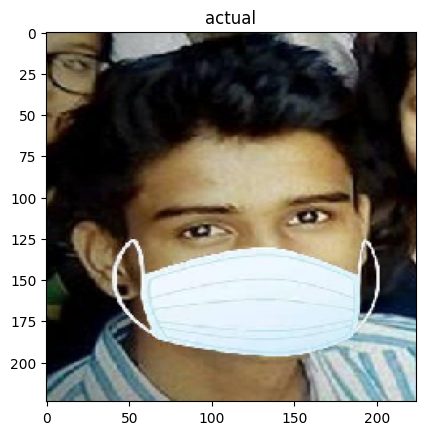

In [30]:
plt.imshow(img)
plt.title('actual')

In [33]:
from tensorflow.keras.preprocessing import image

img_without_mask = image.load_img('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1001.jpg', target_size=(target_size, target_size))
img_array = image.img_to_array(img_without_mask)
img_array = np.expand_dims(img_array, axis = 0)

pred = Model.predict(img_array)

if pred[0][0] > 0.5:
  print('without mask')
else:
  print('with mask')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
without mask


In [ ]:
plt.imshow(img)
plt.title('actual')